# Olist Brazilian E-Commerce - Merging Datasets and Initial Relationships Exploration

### This script contains the following:

#### 1. Import Libraries
#### 2. Import Datasets
#### 2.1 Orders Dataset
#### 2.2. Order Items Dataset
#### 2.3 Products Dataset
#### 3. Merging datasets
#### 4. Export merged dataset

### Task 6.2

#### 1. Pick out variables from the merged data set suitable for a initial exploratory visual analysis.
#### 2. Create a correlation matrix heatmap (colored).
#### 3. Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.
#### 4. Create a pair plot of the entire data set.
#### 5. Create a categorical plot and interpret the results
#### 6. Revisit the questions generated in the previous
#### 7. Define any hypotheses that you can at this point.
#### 8. Export dataset with the flag 'Price category'

### 1. Import Libraries

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import folium
import json

In [7]:
# the charts created are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
# define a path
path = r'C:\Users\junio\OneDrive\Career Foundry Project\Achievement 6\02-2024 Brazilian E-Commerce'

### 2. Import Datasets

### 2.1 Orders Dataset

In [11]:
# import orders dataset

df_ords = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'olist_orders_dataset_wrangled.csv'), index_col = False) 

In [ ]:
# Check head

df_ords.head()

### Remaining cleaning procedures before merging with other datasets

#### Dropping Columns:

In [16]:
# Drop unnecessary columns  from orders dataframe, as it will not be relevant for the specific analysis 

df_ords_drop = df_ords.drop(columns = ['order_delivered_carrier_date','Unnamed: 0'])

In [19]:
df_ords_drop.shape

(96475, 6)

In [95]:
df_ords_drop.columns

Index(['order_id', 'customer_id', 'order_status', 'purchase_date',
       'delivered_customer_date', 'estimated_delivery_date'],
      dtype='object')

In [ ]:
df_ords_drop.dtypes

#### Renaming Columns:

In [26]:
# Rename columns 

df_ords_drop.rename(columns = {'order_purchase_timestamp' : 'purchase_date', 'order_delivered_customer_date': 'delivered_customer_date', 
                     'order_estimated_delivery_date': 'estimated_delivery_date' }, inplace = True)

In [31]:
df_ords_drop.columns

Index(['order_id', 'customer_id', 'order_status', 'purchase_date',
       'delivered_customer_date', 'estimated_delivery_date'],
      dtype='object')

#### Missing Values Check:

In [ ]:
# Check for missing values

df_ords_drop.isnull().sum() # No missing values!

#### Duplicates Check:

In [70]:
# Find duplicates

df_ords_dups = df_ords_drop[df_ords_drop.duplicated()]

In [72]:
df_ords_dups.shape # No duplicates!

(0, 6)

#### Mixed_type Data

In [ ]:
for col in df_ords_drop.columns.tolist():
      weird = (df_ords_drop[[col]].applymap(type) != df_ords_drop[[col]].iloc[0].apply(type)).any(axis = 1)
      if len(df_ords_drop[weird]) > 0:
        print(col) 
      else:
         print("No mixed-type columns found!")     # No mixed-type columns either!

### 2.2. Order Items Dataset

In [29]:
# Import Order Items data, this data contains the number of products bought per each order

df_ords_items = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'olist_order_items_wrangled.csv'), index_col = False)

In [ ]:
df_ords_items.head()

### Remaining cleaning procedures before merging with other datasets

#### Dropping Columns:

In [38]:
# Drop unnecessary columns  from order items dataframe, as they will not be relevant for the specific analysis 

df_ords_items_drop = df_ords_items.drop(columns = ['Unnamed: 0','shipping_limit_date'])

In [98]:
df_ords_items_drop.shape

(112650, 6)

#### Renaming Columns:

In [40]:
df_ords_items_drop.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id', 'price',
       'freight_value'],
      dtype='object')

In [41]:
# Rename columns 

df_ords_items_drop.rename(columns = {'order_item_id' : 'item_count'}, inplace = True)

In [ ]:
df_ords_items_drop.head(10)

In [44]:
# Set display options to show all rows and columns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#### Missing Values Check:

In [ ]:
# Check for missing values

df_ords_items_drop.isnull().sum() # No missing values!

#### Duplicates Check:

In [75]:
# Find duplicates

df_ords_item_dups = df_ords_items_drop[df_ords_items_drop.duplicated()]

In [77]:
df_ords_item_dups.shape # No duplicates!

(0, 6)

In [ ]:
df_ords_items_drop['item_count'].value_counts(dropna = False)

#### Mixed_type Data

In [ ]:
for col in df_ords_items_drop.columns.tolist():
      weird = (df_ords_items_drop[[col]].applymap(type) != df_ords_items_drop[[col]].iloc[0].apply(type)).any(axis = 1)
      if len(df_ords_items_drop[weird]) > 0:
        print(col) 
      else:
         print("No mixed-type columns found!")   # No mixed-type columns either!

### 2.3 Products Dataset

In [80]:
# Import products dataset

prods = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'olist_products_eng_merged.csv'), index_col = False)

In [ ]:
prods.head()

### Remaining cleaning procedures before merging with other datasets

#### Dropping Columns:

In [82]:
# Drop unnecessary columns

prods_drop = prods.drop(columns = ['Unnamed: 0'])

In [83]:
prods_drop.shape

(32328, 2)

#### Renaming Columns:

In [100]:
prods_drop.columns

Index(['product_id', 'product_category_name_english'], dtype='object')

In [101]:
# Rename columns

prods_drop.rename(columns = {'product_category_name_english' : 'prod_category'}, inplace = True)

#### Missing Values Check:

In [ ]:
# Check for missing values

prods_drop.isnull().sum() # No missing values!

#### Duplicates Check:

In [103]:
# Find duplicates

prods_drop_dups = prods_drop[prods_drop.duplicated()]

In [104]:
prods_drop_dups.shape # No duplicates!

(0, 2)

#### Mixed_type Data

In [ ]:
for col in prods_drop.columns.tolist():
      weird = (prods_drop[[col]].applymap(type) != prods_drop[[col]].iloc[0].apply(type)).any(axis = 1)
      if len(prods_drop[weird]) > 0:
        print(col) 
      else:
         print("No mixed-type columns found!")   # No mixed-type columns either!

### 3. Merging datasets

In [ ]:
# check head of orders dataset

df_ords_drop.head()

In [ ]:
# check head of order_items dataset

df_ords_items_drop.head()

#### Merging Orders dataset with order_items dataset
     unique identifier : order_id

In [107]:
ords_item_count_merged = df_ords_drop.merge(df_ords_items_drop, on = 'order_id', indicator = True)

In [109]:
ords_item_count_merged.shape

(110195, 12)

In [ ]:
ords_item_count_merged.head()

In [124]:
# check whether there is a full match or not. 
### They do have a full match  the default Join was applied (using how = 'inner')., tha is, Inner Join)

ords_item_count_merged['_merge'].value_counts(dropna = False)   # The merge worked!

_merge
both          110195
left_only          0
right_only         0
Name: count, dtype: int64

In [ ]:
ords_item_count_merged.info()

In [ ]:
# Check head of products dataset

prods_drop.head()

#### Merging orders and itemn per order with 'products' dataset
     unique identifier : product_id

In [116]:
ords_items_prod_merged = ords_item_count_merged.merge(prods_drop, on = 'product_id', indicator = 'merged2')

In [118]:
ords_items_prod_merged.shape

(108636, 14)

In [ ]:
# check head
ords_items_prod_merged.info()

In [ ]:
# check whether there is a full match or not. 
### They do have a full match  the default Join was applied (using how = 'inner')., tha is, Inner Join)

ords_items_prod_merged['merged2'].value_counts(dropna = False)   # The merge worked!

In [ ]:
ords_items_prod_merged.columns

#### Dropping columns that are no more needed

In [ ]:
# check counts 

ords_items_prod_merged['order_status'].value_counts()

In [ ]:
# Drop unnecessary columns

ords_items_prod_merged.drop(columns = ['_merge','merged2'], inplace = True)

In [138]:
# Drop 'order_status' column, it is not relevant for the analysis, expept for a few (7) values, the entries are all the same = delivered

ords_items_prod_merged.drop(columns = ['order_status'], inplace = True)

In [ ]:
ords_items_prod_merged.head()

### 4. Export merged dataset
       orders, order_item and products

In [143]:
ords_items_prod_merged.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'ords_items_prods_merged.csv'))

## Task 6.2

### 1. Pick out variables from the merged data set suitable for a initial exploratory visual analysis.

In [145]:
ords_items_prod_merged.columns

Index(['order_id', 'customer_id', 'purchase_date', 'delivered_customer_date',
       'estimated_delivery_date', 'item_count', 'product_id', 'seller_id',
       'price', 'freight_value', 'prod_category'],
      dtype='object')

In [152]:
# create a subset excluding the 'order_id', 'customer_id','purchase_date' 'delivered_customer_date','estimated_delivery_date','product_id'
# and 'seller_id' columns

sub = ords_items_prod_merged[['item_count','price', 'freight_value']]

In [ ]:
sub.head()

### 2. Create a correlation matrix heatmap (colored).

In [154]:
# Create a correlation matrix using pandas

sub.corr()

,item_count,price,freight_value
item_count,1.000000,-0.060487,-0.029411
price,-0.060487,1.000000,0.412861
freight_value,-0.029411,0.412861,1.000000


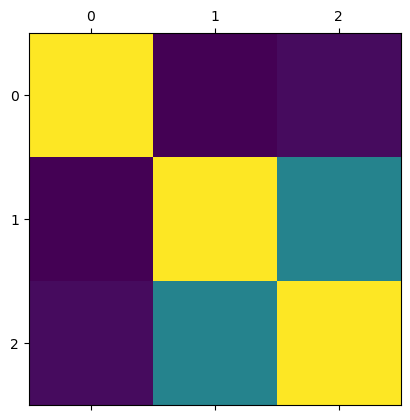

In [159]:
# Create a correlation heatmap using matplotlib
# Save figure

plt.matshow(sub.corr())
plt.savefig("6_2_correlation.png") 

# This will save the image in the working directory. 

In [158]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\junio\\OneDrive\\Career Foundry Project\\Achievement 6\\02-2024 Brazilian E-Commerce\\03 Scripts'

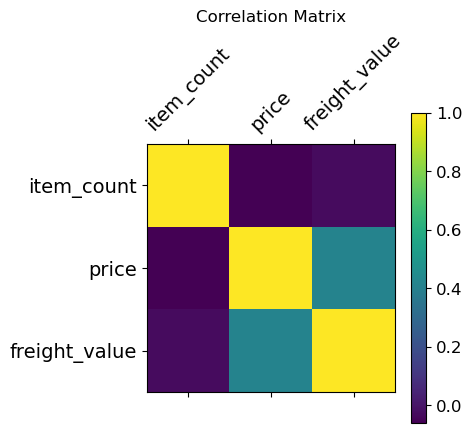

In [170]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(4, 4)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=12) # add font size
plt.title('Correlation Matrix', fontsize=12) # add title
plt.savefig('6_2_correlation.png',bbox_inches ='tight')   # Save figure

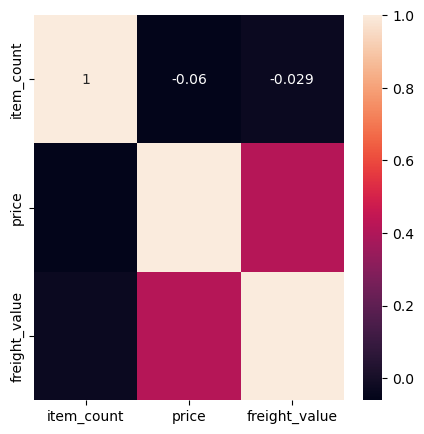

In [171]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(5,5))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

##### The variables above indicate, for instance, no relatioship between 'freight_value' and 'item_count'
##### On the other hand there is observed a moderate relatioship between 'freight_value' and 'price' of product
##### Finally there is a negative relatioship between item_count and 'price' of product, what is very logical

   Correlation coeficient reminder

   0: no relationship   
0.1–0.3: weak relationship   
0.3–0.5: moderate relationshi   p
0.5–1.0: strong relationship

### 3. Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.

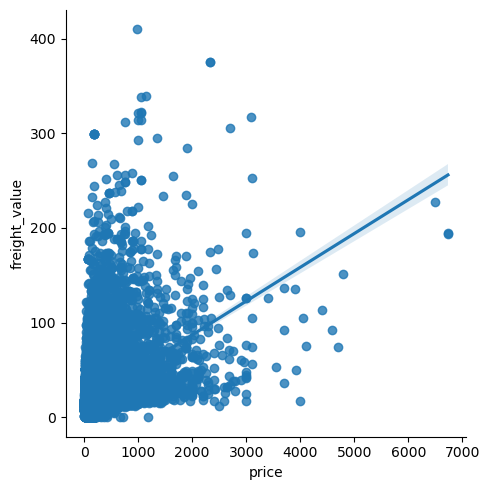

In [174]:
# Create a scatterplot for the "house age" and "price per unit" columns in seaborn

sns.lmplot(x = 'price', y = 'freight_value', data = ords_items_prod_merged)

##### In the scatterplot, you can see a positve trend,the trend line is very upward, however, there is this huge concentrates of points
##### in the left-hand corner of the graph, this lies peharps because the correlation between price of products and freight values does not repeats that       much. There are also a lot of outliers due to the variance in this relatioship

#####  So, as it is common sense that  freight_values mostly are calculated with other variables together, such as, distance, wheigt, for example, rather price of products.

### 4. Create a pair plot of the entire data set.

In [ ]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['House age', 'D. metro', 'N. shops', 'Price per unit']]

C:\Users\junio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\junio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\junio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


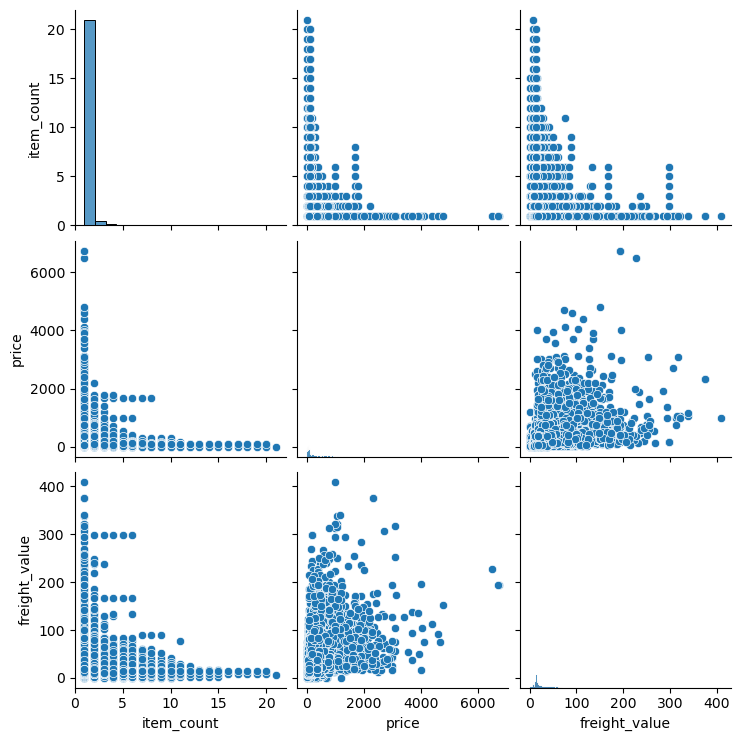

In [176]:
# Create a pair plot with the  entire dataset earlier

g = sns.pairplot(ords_items_prod_merged)

##### I will explore maybe the freight_value level, products prices, and item_count. 
##### UsuallyI 'freight_values' get cheaper when divided by into quantity of items ordered for a customer.
##### However, I going to explore further other variables that are merged with this dataset yet.

### 5. Create a categorical plot and interpret the results
       Creating a categorical variable that splits the 'price' column into categories

C:\Users\junio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

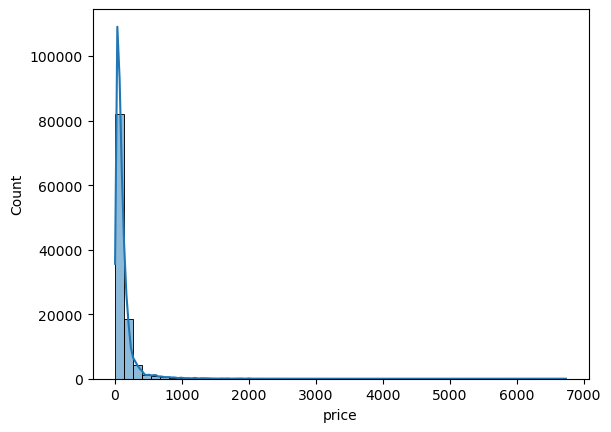

In [205]:
# Use a histogram to visualize the distribution of the variables. 
# This way, I can determine sensible categories for the price ranges. 
# The argument "kde" add a line that encompasses the distribution

sns.histplot(ords_items_prod_merged['price'],  bins = 50,kde = True)

In [211]:
ords_items_prod_merged['price'].describe()

count    108636.000000
mean        120.077588
std         182.063862
min           0.850000
25%          39.900000
50%          74.900000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

##### Creating a flag price variable based on the histrogram above

In [213]:
ords_items_prod_merged.loc[ords_items_prod_merged['price'] < 50, 'Price category'] = 'Low price'

In [219]:
ords_items_prod_merged.loc[(ords_items_prod_merged['price'] >= 50) & (ords_items_prod_merged['price'] < 200), 'Price category'] = 'Middle price'

In [220]:
ords_items_prod_merged.loc[ords_items_prod_merged['price'] >= 200, 'Price category'] = 'High price'

In [221]:
# check the counts of the new variable

ords_items_prod_merged['Price category'].value_counts(dropna = False)

Price category
Middle price    58121
Low price       37612
High price      12903
Name: count, dtype: int64

In [222]:
ords_items_prod_merged.columns

Index(['order_id', 'customer_id', 'purchase_date', 'delivered_customer_date',
       'estimated_delivery_date', 'item_count', 'product_id', 'seller_id',
       'price', 'freight_value', 'prod_category', 'Price category'],
      dtype='object')

C:\Users\junio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\junio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


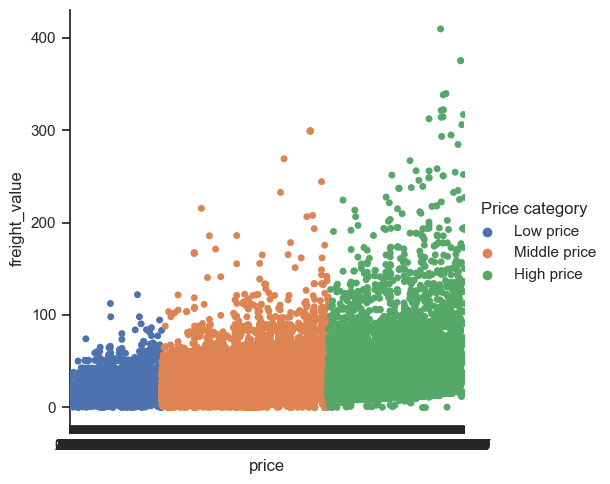

In [223]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x= 'price', y='freight_value', hue="Price category", data=ords_items_prod_merged)

### 6. Revisit the questions generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far.Add any new questions that may have arisen based on the early findings in your visual exploration.

##### - Does the price range of products ordered change significantly?
        Yes, the price vary a lot, but with this initial analysis we can observe that about 60% of the products ordered fall into the
        'Middle price' category', meaning they have a price between 50-200 $               

### 7. Define any hypotheses that you can at this point. You’ll be testing these later on.

##### 1st Hypothesis:
##### Sales volume of Olist E-Commerce does not demonstrate a statistically significant difference across the different regions in Brazil.
       This will be assessed by comparing sales data from Olist across states or cities within Brazil using appropriate statistical tests..

### 8. Export dataset with the flag 'Price category'

In [224]:
ords_items_prod_merged.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'ords_items_prod_merged_price_flag.csv'))